In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [8]:
df = pd.read_csv('Salary_Data.csv')

In [9]:
# Print unique values before cleaning
print(df['Gender'].unique())

# Replace missing values and clean the 'Gender' column
df['Gender'] = df['Gender'].fillna('Other')  # Replace 'inplace=True' with direct assignment

# Check unique values after cleaning
print(df['Gender'].unique())

# Clean 'Gender' column values
df['Gender'] = df['Gender'].str.strip()  # Remove leading and trailing whitespaces


['Male' 'Female' nan 'Other']
['Male' 'Female' 'Other']


In [10]:
# Merge similar education levels into broader categories
df['Education Level'] = df['Education Level'].replace({
    "phD": "PhD",
    "Master's": "Master",
    "Master's Degree": "Master",
    "Bachelor's": "Bachelor",
    "Bachelor's Degree": "Bachelor",
    'High School': 'High School'
})

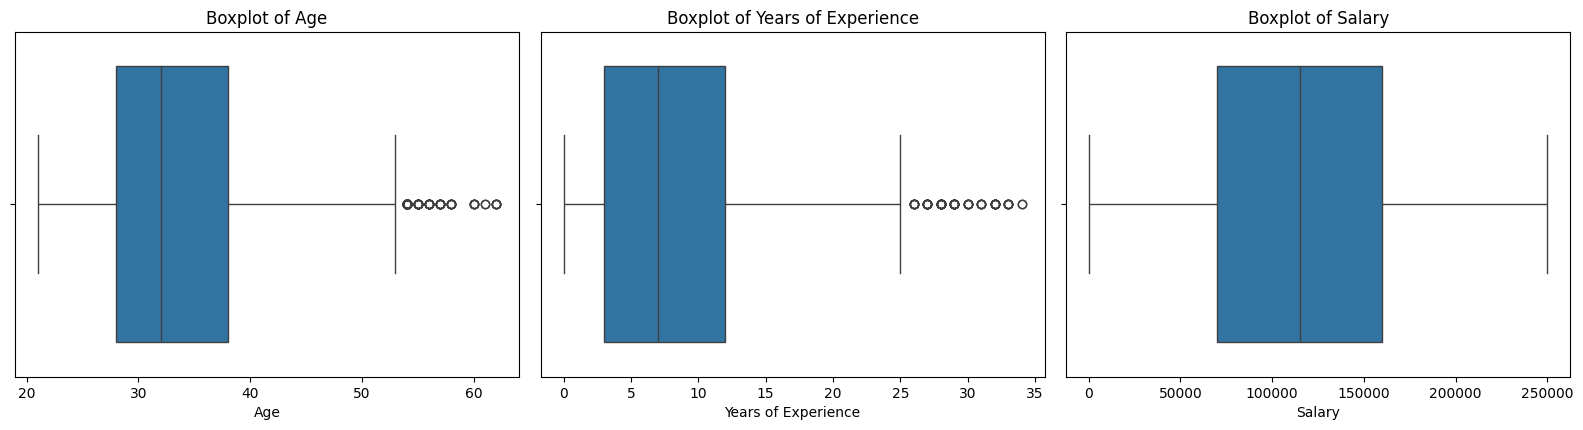

Outliers:
Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []


In [11]:




# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print("Outliers:")
print(outliers)



In [12]:
 #no rows were identified as outliers using the method.

In [13]:



#Replace categorical values with numerical values using dummy variables

df = pd.get_dummies(df, columns=['Education Level', 'Gender'], prefix=['Education', 'Gender'])

# Check for missing values
missing_rows = df.isnull().any(axis=1)


In [14]:
print(df.columns)


Index(['Age', 'Job Title', 'Years of Experience', 'Salary',
       'Education_Bachelor', 'Education_High School', 'Education_Master',
       'Education_PhD', 'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')


In [15]:
# Convert boolean columns to 1 and 0
boolean_columns = [
    'Education_Bachelor', 'Education_High School', 'Education_Master', 
    'Education_PhD', 'Gender_Female', 'Gender_Male', 'Gender_Other'
]

for column in boolean_columns:
    df[column] = df[column].astype(int)

# Print the DataFrame to check the conversion
print(df.head())


    Age          Job Title  Years of Experience    Salary  Education_Bachelor  \
0  32.0  Software Engineer                  5.0   90000.0                   1   
1  28.0       Data Analyst                  3.0   65000.0                   0   
2  45.0     Senior Manager                 15.0  150000.0                   0   
3  36.0    Sales Associate                  7.0   60000.0                   1   
4  52.0           Director                 20.0  200000.0                   0   

   Education_High School  Education_Master  Education_PhD  Gender_Female  \
0                      0                 0              0              0   
1                      0                 1              0              1   
2                      0                 0              1              0   
3                      0                 0              0              1   
4                      0                 1              0              0   

   Gender_Male  Gender_Other  
0            1           

In [16]:
# Drop the 'Job Title' column
df_dropped = df.drop(columns=['Job Title'])


In [17]:
correlation_matrix = df_dropped.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                            Age  Years of Experience    Salary  \
Age                    1.000000             0.937655  0.728053   
Years of Experience    0.937655             1.000000  0.808969   
Salary                 0.728053             0.808969  1.000000   
Education_Bachelor    -0.400038            -0.400153 -0.347600   
Education_High School -0.237833            -0.273011 -0.398759   
Education_Master       0.126088             0.158653  0.173666   
Education_PhD          0.501331             0.486804  0.483203   
Gender_Female         -0.118346            -0.100629 -0.127406   
Gender_Male            0.115017             0.094812  0.126514   
Gender_Other           0.035757             0.062940  0.009141   

                       Education_Bachelor  Education_High School  \
Age                             -0.400038              -0.237833   
Years of Experience             -0.400153              -0.273011   
Salary                          -0.347600        

In [18]:
# Higher positive correlation means that as one variable increases, the other variable also increases proportionally.
# As for higher negative, It means that as one variable increases, the other variable decreases proportionally.

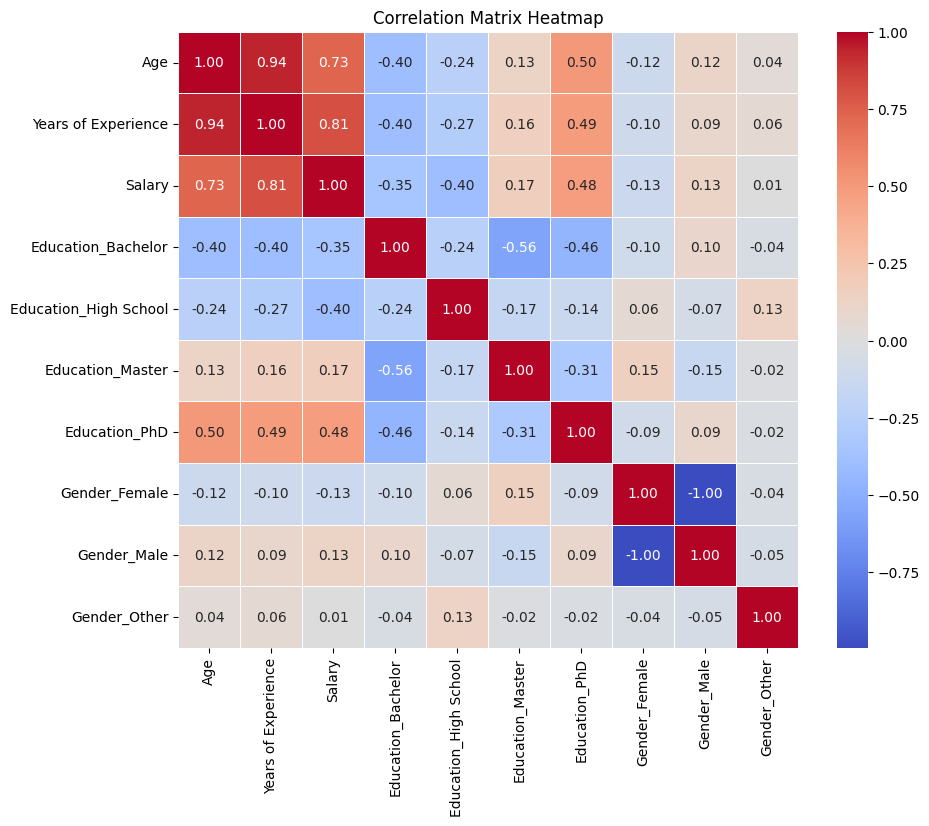

In [19]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Fill missing values with the mean for numerical columns
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean())
        
        
# Remove 'Job Title' and 'Salary' columns
X = df.drop(['Job Title', 'Salary'], axis=1)
y = df['Salary'].values

# Save 'Job Title' in variable A, the job title will be analysed in the future coding
A = df.pop('Job Title')

print(X.columns)
print(df.columns)

Index(['Age', 'Years of Experience', 'Education_Bachelor',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')
Index(['Age', 'Years of Experience', 'Salary', 'Education_Bachelor',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')


In [21]:
#Job title and Salary is removed from the dataset as Salary is used for the target prediction


In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# #Standardizing the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# y_df = pd.DataFrame(y, columns=['Salary'])
# y_scaled = scaler.fit_transform(y_df.values)

# Perform Ridge Regression with cross-validated alpha selection
# lambda_values = [0.001,0.01,0.1,1,10,100]
# ridge = RidgeCV(alphas=lambda_values, cv=10, scoring='neg_mean_squared_error')
# ridge.fit(X_train, y_train)
# y_pred = ridge.predict(X_test)


In [23]:
#Above displays the initial code before implementing poly Features, as the MSE will be absurdly high

In [28]:
# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardize the target variable after splitting
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [31]:

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # or other strategies like 'median', 'most_frequent'

# Fit and transform training data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [32]:
print("Missing values in X_train_scaled:", np.any(np.isnan(X_train_scaled)))
print("Missing values in X_test_scaled:", np.any(np.isnan(X_test_scaled)))


Missing values in X_train_scaled: False
Missing values in X_test_scaled: False


In [33]:
# Add Polynomial Features
# Enhanced version of the model
degree = 2  # You can adjust the degree as needed
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Standardize the polynomial features
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Perform Ridge Regression with cross-validated alpha selection on polynomial features
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_poly = RidgeCV(alphas=lambda_values, cv=10, scoring='neg_mean_squared_error')
ridge_poly.fit(X_train_poly_scaled, y_train_scaled)
y_pred_poly_scaled = ridge_poly.predict(X_test_poly_scaled)

In [34]:
# Use the alpha that minimizes MSE
best_alpha_poly = 10

# Perform Ridge Regression with the chosen alpha
ridge_poly_model_best = Ridge(alpha=best_alpha_poly)
ridge_poly_model_best.fit(X_train_poly_scaled, y_train_scaled)
y_pred_poly_scaled_best = ridge_poly_model_best.predict(X_test_poly_scaled)

# Evaluate the model
mse_best_poly = mean_squared_error(y_test_scaled, y_pred_poly_scaled_best)
r2_best_poly = r2_score(y_test_scaled, y_pred_poly_scaled_best)



In [35]:
# Print results after polynomial features and ridge regression
print("Best Alpha (Poly):", best_alpha_poly)  # Corrected variable name
print("Best Mean Squared Error (Poly):", mse_best_poly)
print("Best R-squared (R2) Score (Poly):", r2_best_poly)




Best Alpha (Poly): 10
Best Mean Squared Error (Poly): 524680418.6175534
Best R-squared (R2) Score (Poly): 0.8035416731127119


In [36]:
#the best alpha selected through cross-validation is 10.
#A lower MSE indicates a better fit of the model to the data. 
#In this case, the best-fitted polynomial ridge regression model achieved an MSE of approximately 0.1866.
#An R2 score of 0.8036 suggests that approximately 80.36% of the variance in the target variable (salary) 
#can be explained by the independent variables (features) 

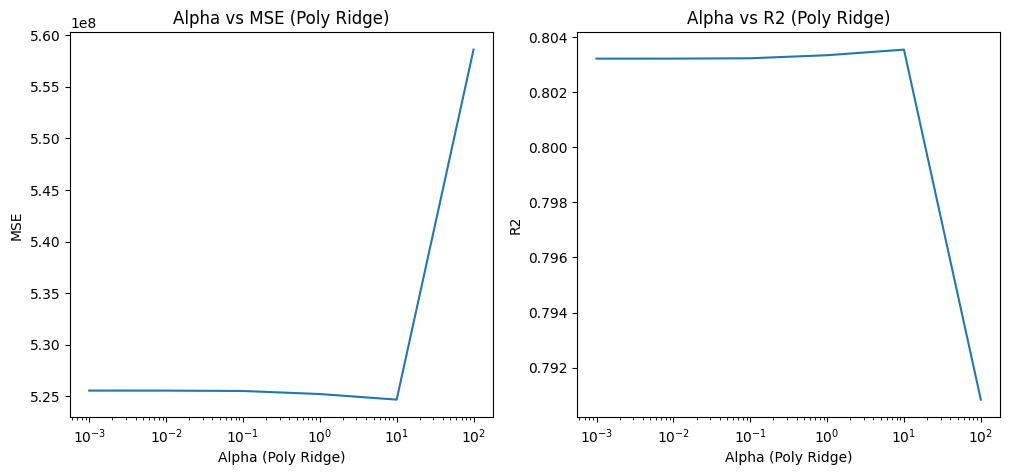

In [37]:
# Perform Ridge Regression with a range of alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
mse_values_poly = []
r2_values_poly = []

for alpha_val in alpha_values:
    ridge_poly_model = Ridge(alpha=alpha_val)
    ridge_poly_model.fit(X_train_poly_scaled, y_train_scaled)
    y_pred_poly_scaled = ridge_poly_model.predict(X_test_poly_scaled)
    mse_poly = mean_squared_error(y_test_scaled, y_pred_poly_scaled)
    r2_poly = r2_score(y_test_scaled, y_pred_poly_scaled)
    mse_values_poly.append(mse_poly)
    r2_values_poly.append(r2_poly)

# Plot alpha_values vs. R2 for Polynomial Ridge Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values_poly)
plt.xlabel('Alpha (Poly Ridge)')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('Alpha vs MSE (Poly Ridge)')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, r2_values_poly)
plt.xlabel('Alpha (Poly Ridge)')
plt.ylabel('R2')
plt.xscale('log')
plt.title('Alpha vs R2 (Poly Ridge)')

plt.show()


In [38]:
#This shows that the best lambda is aournd 10, because MSE is the lowest and R2 is the highest when alpha = 10
#Lower MSE indicates better fit and smaller difference between actual and predicted data
#Higher R2 denotes the proportion of the variance in the Salary that is explained by the independent variables(Age,Experience,etc)


In [39]:
# Sample mapping for job title grouping
job_title_mapping = {
   
    'IT/Software': [
        'Software Engineer', 'Software Developer', 'IT Support', 'Web Developer',
        'Data Scientist', 'Data Analyst', 'IT Manager', 'Network Engineer',
        'Front End Developer', 'Back end Developer', 'Full Stack Engineer',
        'Developer', 'Front End Developer', 'Director of Data Science'
    ],
    'Management': [
        'Senior Manager', 'Director', 'Product Manager', 'Manager', 'CEO',
        'Project Manager', 'Operations Director', 'Chief Technology Officer',
        'Senior Project Manager', 'Business Development Manager',
        'Senior Product Manager', 'Director of Sales and Marketing',
        'Senior Operations Manager', 'Chief Data Officer',
        'Director of Human Resources', 'Director of Product Management',
        'Director of Business Development', 'Director of HR',
        'Director of Engineering'
    ],
    'Sales': [
        'Sales Associate', 'Sales Director', 'Sales Executive',
        'Sales Representative', 'Sales Operations Manager',
        'Junior Sales Representative'
    ],
    'Marketing Management': [
        'Marketing Manager', 'Digital Marketing Manager',
        'Content Marketing Manager', 'Social Media Manager',
        'Public Relations Manager', 'Marketing Director',
        'Senior Marketing Manager', 'Product Marketing Manager',
        'Senior Marketing Coordinator'
    ],
    'Marketing': [
        'Marketing Analyst', 'Marketing Coordinator',
        'Marketing Specialist', 'Digital Content Producer',
        'Senior Marketing Analyst', 'Junior Marketing Analyst',
        'Junior Marketing Manager', 'Junior Marketing Specialist',
        'Junior Marketing Coordinator', 'Social M', 'Social Media Man',
        'Junior Social Media Manager', 'Senior Marketing Specialist',
        'Junior Advertising Coordinator', 'Junior Social Media Specialist'
    ],
    'Human Resources': [
        'HR Manager', 'HR Generalist', 'VP of HR', 'Human Resources Director',
        'Senior HR Manager', 'Junior HR Generalist', 'Senior HR Generalist',
        'Juniour HR Generalist', 'Juniour HR Coordinator', 'HR Specialist',
        'HR Coordinator', 'HR Assistant'
    ],
    'Finance': [
        'Financial Analyst', 'Financial Manager', 'Financial Advisor',
        'Junior Financial Analyst', 'Senior Financial Analyst',
        'Senior Financial Manager', 'Junior Financial Advisor',
        'Financial Planner'
    ],
    'Customer Service': [
        'Customer Service Rep', 'Customer Service Manager',
        'Customer Service Representative', 'Customer Success Rep',
        'Customer Success Manager'
    ],
    'Engineering': [
        'Senior Engineer', 'Project Engineer', 'Junior Engineer',
        'Network Engineer', 'Software Architect', 'Full Stack Engineer',
        'Back end Developer', 'Front end Developer', 'Developer',
        'Front End Developer'
    ],
    'Data/Analytics': [
        'Data Scientist', 'Data Analyst', 'Research Scientist',
        'Junior Data Analyst', 'Senior Data Analyst', 'Data Engineer',
        'Data Entry Clerk', 'Senior Data Scientist',
        'Junior Data Scientist', 'Senior Research Scientist', 'Researcher'
    ],
    'Creative': [
        'Product Designer', 'Graphic Designer', 'UX Designer', 'UX Researcher',
        'Copywriter', 'Creative Director'
    ],
    'Operations': [
        'Operations Manager', 'Operations Director', 'Operations Analyst',
        'Operations Coordinator', 'Senior Operations Manager',
        'Senior Operations Analyst', 'Senior Operations Coordinator',
        'Junior Operations Manager', 'Junior Operations Analyst',
        'Junior Operations Coordinator'
    ],
    'IT Management': [
        'IT Manager', 'Director of Data Science', 'Chief Technology Officer',
        'Chief Data Officer', 'Director of Engineering', 'IT Project Manager',
        'IT Consultant', 'IT Support Specialist', 'Software Project Manager',
        'IT Support'
    ],

    'Consulting': [
        'Consultant', 'Strategy Consultant', 'Management Consultant'
    ],
    'Research and Development': [
        'Research Scientist', 'Junior Research Scientist', 'Principal Scientist'
    ],
    'Supply Chain': [
        'Supply Chain Manager', 'Supply Chain Analyst', 'Supply Chain Coordinator'
    ],

    'Other': ['Other'],

   
}

def map_job_category(job_title):
    for category, titles in job_title_mapping.items():
        if job_title in titles:
            return category
    return 'Other'

df['Job Category'] = A.apply(map_job_category)  # Use variable A instead of df['Job Title']
print(df['Job Category'].unique())



['IT/Software' 'Management' 'Sales' 'Marketing' 'Other' 'Human Resources'
 'Finance' 'Customer Service' 'Operations' 'Marketing Management'
 'Engineering' 'Data/Analytics' 'Creative' 'Consulting'
 'Research and Development' 'Supply Chain' 'IT Management']


In [40]:
#We've group the jobs into broader categories due to the vastness of the titles

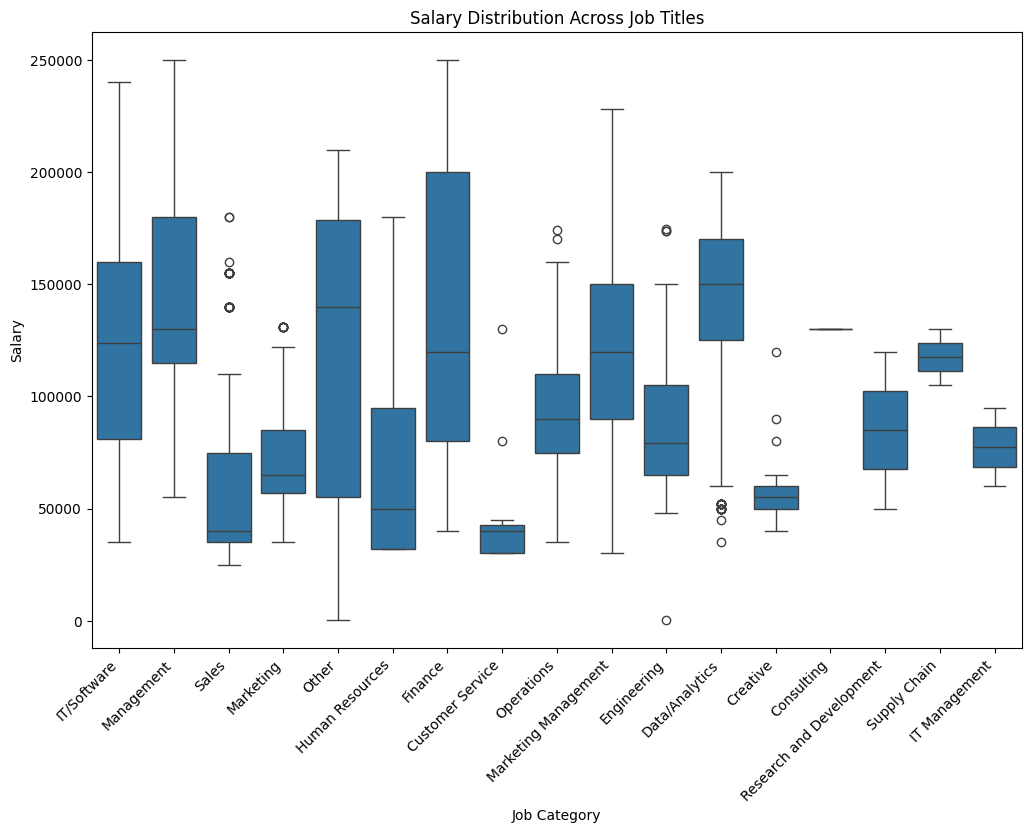

In [43]:
# Visualize the relationship between 'Job Title' and 'Salary'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Category', y='Salary', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution Across Job Titles')
plt.show()

In [42]:
#Boxplot exibits the range of remuneration for different jobs, so that we can have a cursory view on whats the pay on that specific profession
#Of course, this model can be implmented in real life problems.

#for instance, an employer want to hire a manager, he can use this as a reference and further predict the pay by using our trained model.

